<a href="https://colab.research.google.com/github/gabrielzerraa/ENEM_2022/blob/main/Regress%C3%A3o_Linear2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pacotes

# Pacotes de Dados
import pandas as pd
import numpy as np

# Pacotes de Dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Informações do dataframe

In [2]:
# Abrir os dados

local = '/content/drive/MyDrive/Estudos - Ciëncias de Dados/Python for Data Science and Machine Learning Bootcamp/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/Ecommerce Customers'
dados = pd.read_csv(local)
dados.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
# Resumo estatístico
dados.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Análise Exploratória dos Dados - EDA

In [5]:
# Definindo o estilo e a paleta de cores dos gráficos

sns.set_style('darkgrid')
sns.set_palette('rocket')

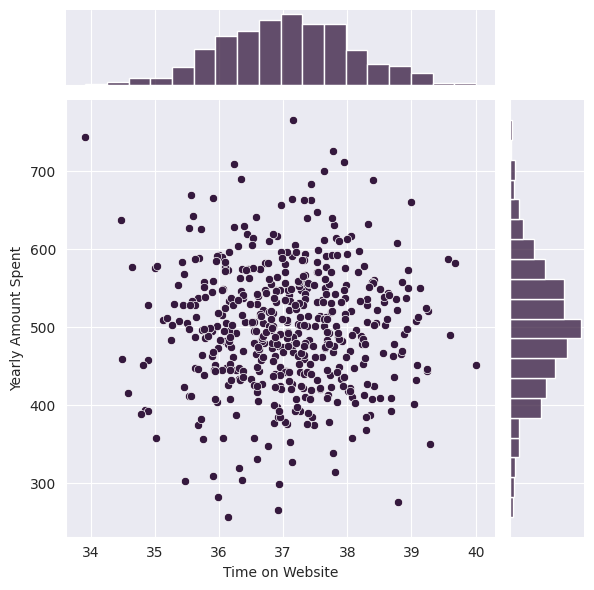

In [6]:
# Gráfico para comparar o tempo no site e o valor gasto por ano
sns.jointplot(data=dados, x='Time on Website',y='Yearly Amount Spent')

plt.show()

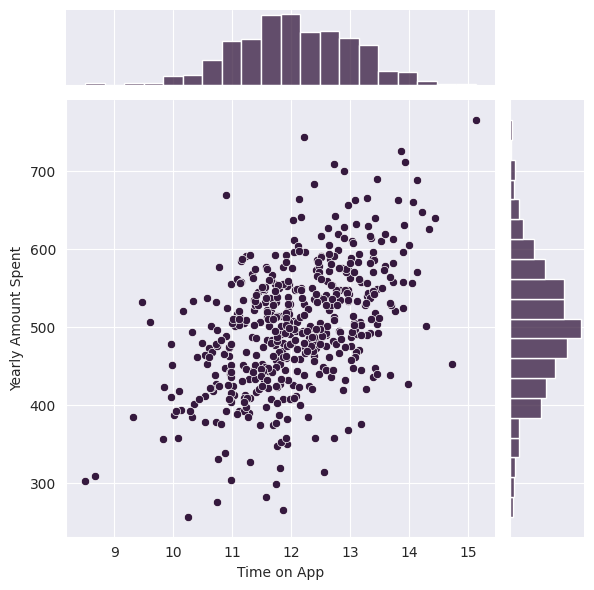

In [7]:
# Gráfico para comparar o tempo no aplicativo e o valor gasto por ano
sns.jointplot(data=dados, x='Time on App',y='Yearly Amount Spent')

plt.show()

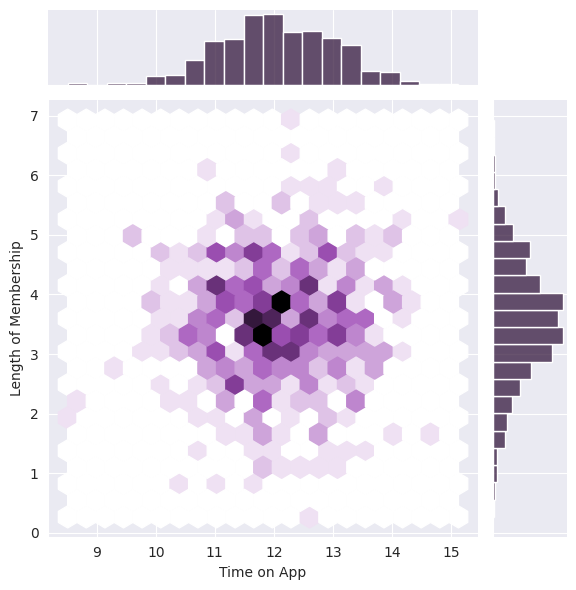

In [8]:
# Gráfico para comparar o tempo no aplicativo e a duração da associação
sns.jointplot(data=dados, x='Time on App',y='Length of Membership', kind='hex')

plt.show()

<ipython-input-9-b10c44297013>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr())


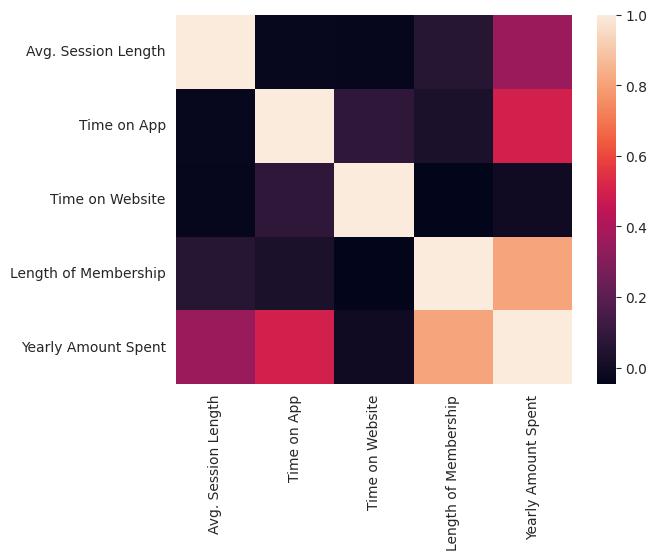

In [9]:
# Correlação entre os dados
sns.heatmap(dados.corr())
plt.show()

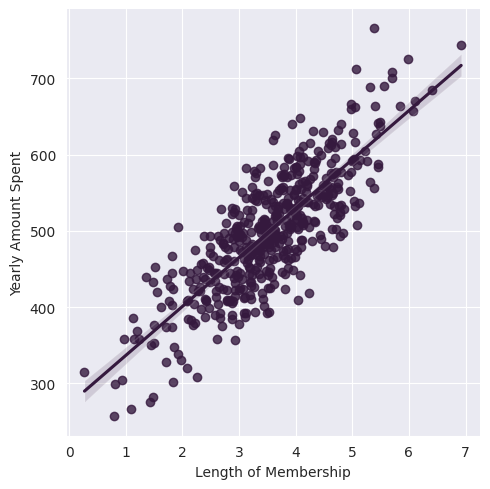

In [10]:
# Gráfico de dispersão com o Lenght Membership pelo Yearl Amount Speny
sns.lmplot(data=dados, x='Length of Membership',y='Yearly Amount Spent')

plt.show()

### Treino e Teste

In [11]:
# Definido o Y e os X

y = dados['Yearly Amount Spent']
x = dados[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [13]:
# Treinando o modelo
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [14]:
# Interceptação, coeficente e score
print(f"A interceptação é no ponto: {modelo.intercept_}")
print(f"O coeficiente é: {modelo.coef_}")
print(f'O score do modelo é: {modelo.score(x_train,y_train)}')

A interceptação é no ponto: -1047.9327822502391
O coeficiente é: [25.98154972 38.59015875  0.19040528 61.27909654]
O score do modelo é: 0.9817562058732432


### Predição

In [15]:
# Predição do teste do modelo
predicao = modelo.predict(x_test)

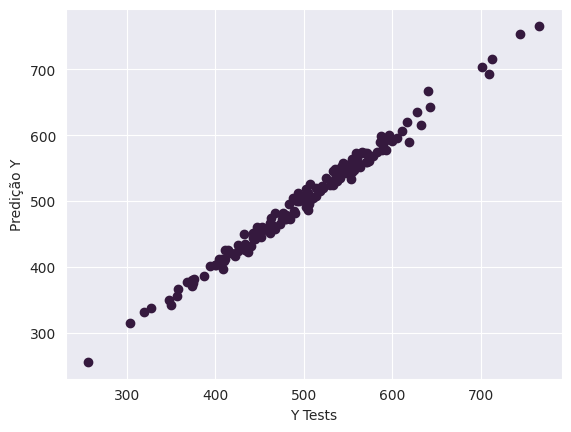

In [16]:
# Gráfico de dispersão com os valores preditos e de teste
plt.scatter(y_test,predicao)
plt.xlabel('Y Tests')
plt.ylabel('Predição Y')

plt.show()

### Qualidade do modelo

In [17]:
#
print('MAE:', metrics.mean_absolute_error(y_test, predicao))
print('MSE:', metrics.mean_squared_error(y_test, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicao)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


### Residuais

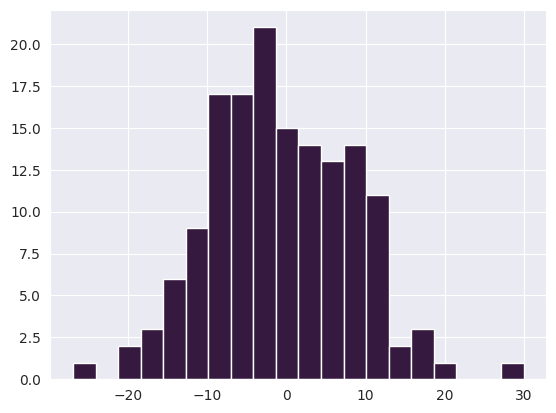

In [22]:
# Plotar o histograama dos residuais
plt.hist((y_test-predicao), bins=20)

plt.show()